In [3]:
install.packages("Rtsne")
library(Rtsne)
library(tidyverse)
library(caret)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [4]:
df <- read.csv("train.csv", nrows = 2000)

train.index <- createDataPartition(df$label, p = .7, list = FALSE)
train <- df[ train.index,]
test  <- df[-train.index,]

In [5]:
# pixel range from 0-255
x_train <- train %>% select(- label) 
y_train <- train %>% select(label)

x_test <- test %>% select(- label)
y_test <- test %>% select(label)

In [6]:
x_train <- as.matrix(x_train) / 255
x_test <- as.matrix(x_test) / 255

In [7]:
pca <- prcomp(x_train, rank=128)
x_train_pca <- x_train %*% pca$rotation
x_test_pca <- x_test %*% pca$rotation

In [9]:
example <- as.matrix(x_test_pca[1,])
diff <- sweep(x_train_pca, 2, example)
dist <- as.matrix(sqrt(colSums(diff %*% t(diff))))

knn <- order(dist)[1:10]
y_train[knn,]
y_test[1,]

[1] 5 5 3 3 3 8 2 3 3 3

[1] 3

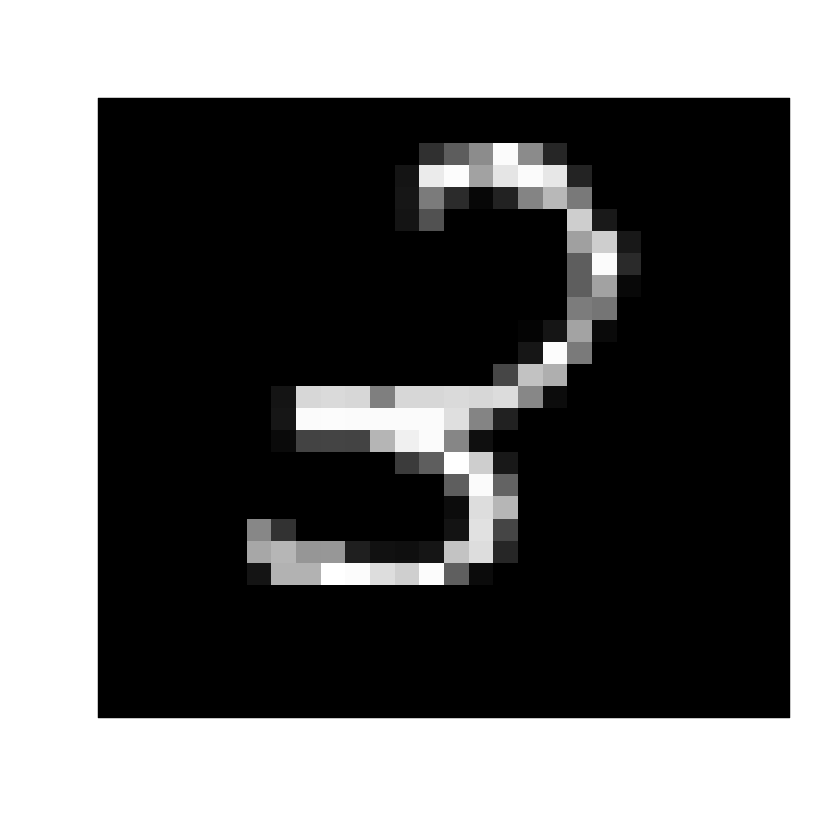

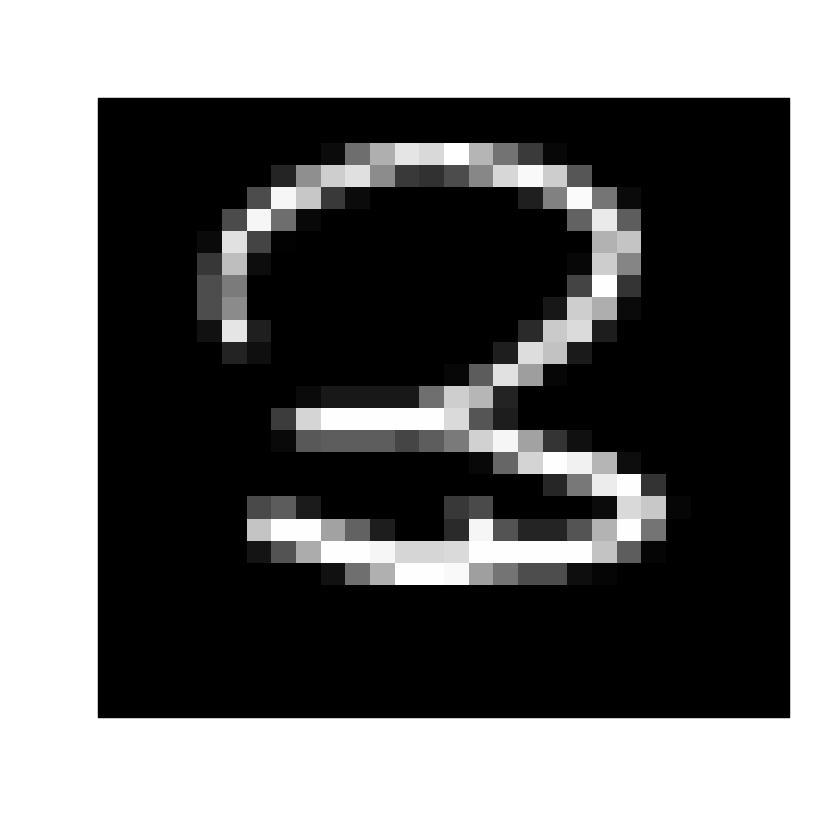

In [12]:
image(matrix(x_train[knn[3],], nrow=28, ncol=28), col=grey(seq(0,1,length=256)), xaxt = "n", yaxt = "n")
image(matrix(x_test[1,], nrow=28, ncol=28), col=grey(seq(0,1,length=256)), xaxt = "n", yaxt = "n")